# Module 1: Curve Fitting

This is a Jupyter Notebook started by James Toh for PHAS0056

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Defining the function


In [33]:
theta = [0,1]
sigma = 0.5
print(np.random.normal(scale=sigma))

-0.5547846144292509


In [41]:
def polyModelWithNoise(x,theta,sigma):
    '''
    x is a numpy array of x values, "theta" are the parameters of the polynomial such that y(x)=∑iθixi and sigma is the standard deviation of the noise distribution that is added        to the polynomial function
    '''
    y = np.polynomial.polynomial.polyval(x,theta)
    noise = np.random.normal(scale=sigma, size=len(y))
    return y + noise

def true_f(x):
    return polyModelWithNoise(x,[0,1],0.5)

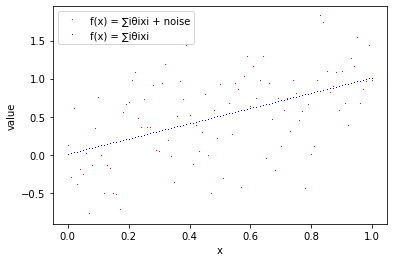

In [42]:
x = np.linspace(0,1,101) #generate x values
y = polyModelWithNoise(x,theta,sigma) #generate y plotting values, could have  used true_f instead here
y2 = theta[0] + theta[1]*x

plt.figure()
plt.plot(x,y,',',label='f(x) = ∑iθixi + noise',color='Red') #plot the values
plt.plot(x,y2,',',color='Blue',label='f(x) = ∑iθixi') #reference plot of the function
plt.ylabel('value')
plt.xlabel('x')
plt.legend(loc='Best')


In [43]:
def polyGradient(x,theta):
    '''
    returns gradient of polynomial function with respect to parameters theta
    '''
    grad = np.array([1, x])
    return grad

In [ ]:
theta = [-1,0.5]
eta = 0.5
j = 1
while j <= 100:
    x = np.random.random(10)
    y = true_f(x)
    